### Hough Transform for Shape Detection

The Hough Transform is a powerful technique used in image processing and computer vision for detecting shapes, such as lines and circles, within an image. The method works by transforming points in an image space to a parameter space where shapes can be detected as peaks. Below are explanations of how the Hough Line Transform and the Hough Circle Transform work.

### Hough Line Transform

#### Concept:
The Hough Line Transform is used to detect straight lines in an image. The basic idea is to transform the points in the image space (x, y) into a parameter space defined by the line parameters. In the case of a line, these parameters are typically the distance from the origin (rho) and the angle from the x-axis (theta).

#### Mathematical Representation:
A line in Cartesian coordinates can be represented as:
$ y = mx + b $
where $ m $ is the slope and $ b $ is the y-intercept.

Alternatively, in the Hough Transform, a line can be represented in polar coordinates as:
$ \rho = x \cos(\theta) + y \sin(\theta) $
where:
- $\rho$ is the distance from the origin to the closest point on the line.
- $\theta$ is the angle between the x-axis and the line connecting the origin with this closest point.

#### Algorithm Steps:
1. **Edge Detection**: Apply an edge detector (e.g., Canny) to find the edges in the image.
2. **Transform Points**: For each edge point $(x, y)$, compute the values of $\rho$ for different values of $\theta$.
3. **Accumulator Space**: Vote in an accumulator space (a 2D array) where each cell corresponds to a specific $(\rho, \theta)$ pair. The value in each cell represents the number of points that are consistent with that line.
4. **Detect Peaks**: Identify peaks in the accumulator space, which correspond to the most prominent lines in the image.
5. **Draw Lines**: Convert the $(\rho, \theta)$ values back to Cartesian coordinates and draw the lines on the image.



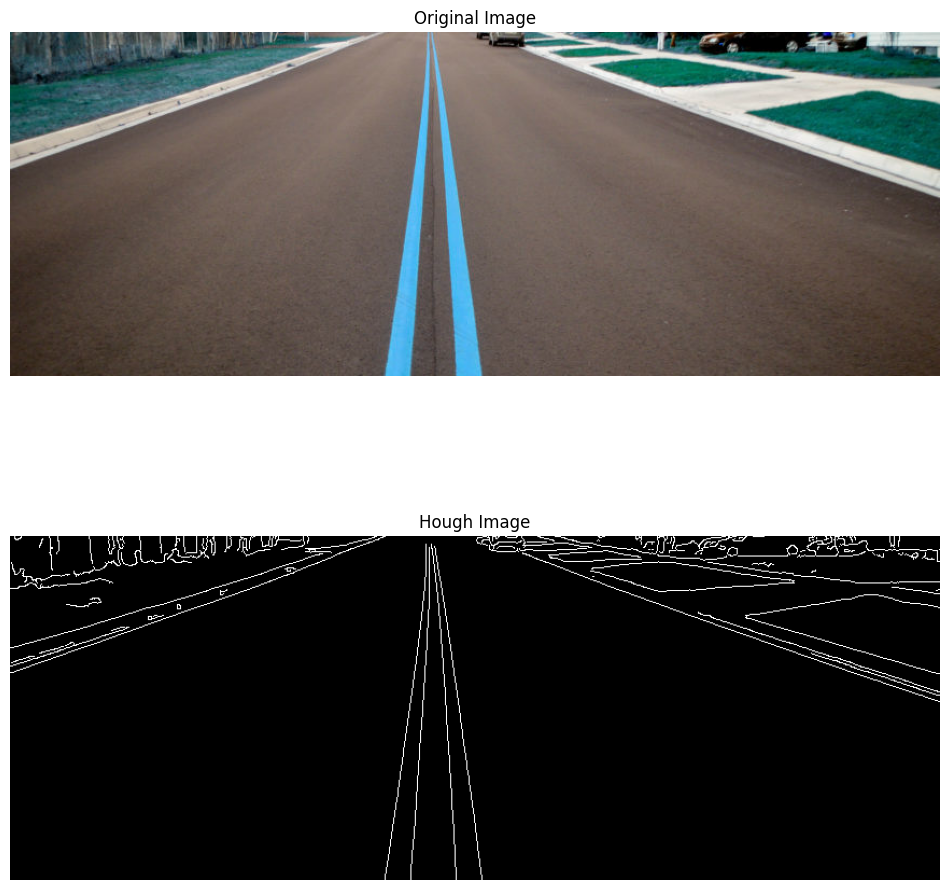

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Draw the lines represented in the hough accumulator on the original image
def drawhoughLinesOnImage(image, houghLines):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            
            cv2.line(image,(x1,y1),(x2,y2),(0,255,0), 2)   

# Different weights are added to the image to give a feeling of blending
def blend_images(image, final_image, alpha=0.7, beta=1., gamma=0.):
    return cv2.addWeighted(final_image, alpha, image, beta,gamma)

image = cv2.imread("image/road.jpg") # load image in grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurredImage = cv2.GaussianBlur(gray_image, (5, 5), 0)
edgeImage = cv2.Canny(blurredImage, 50, 120)

# Detect points that form a line
dis_reso = 1 # Distance resolution in pixels of the Hough grid
theta = np.pi /180 # Angular resolution in radians of the Hough grid
threshold = 170# minimum no of votes

houghLines = cv2.HoughLines(edgeImage, dis_reso, theta, threshold)

houghLinesImage = np.zeros_like(image) # create and empty image

drawhoughLinesOnImage(houghLinesImage, houghLines) # draw the lines on the empty image
orginalImageWithHoughLines = blend_images(houghLinesImage,image) # add two images together, using image blending


plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis("off")
plt.subplot(2, 1, 2)
plt.imshow(edgeImage, cmap='gray')
plt.axis("off")
plt.title('Hough Image')
plt.show()


### Hough Circle Transform

#### Concept:
The Hough Circle Transform is an extension of the Hough Transform used to detect circles. Unlike lines, circles are defined by three parameters: the center coordinates (a, b) and the radius (r).

#### Mathematical Representation:
A circle in Cartesian coordinates can be represented as:
$ (x - a)^2 + (y - b)^2 = r^2 $
where:
- $ (a, b) $ are the coordinates of the circle's center.
- $ r $ is the radius of the circle.

#### Algorithm Steps:
1. **Edge Detection**: Apply an edge detector (e.g., Canny) to find the edges in the image.
2. **Transform Points**: For each edge point (x, y), vote for all possible circles that could pass through that point by varying the parameters a, b, and r.
3. **Accumulator Space**: Use a 3D accumulator space (for a, b, and r) to store the votes.
4. **Detect Peaks**: Identify peaks in the accumulator space, which correspond to the most prominent circles in the image.
5. **Draw Circles**: Convert the parameters back to Cartesian coordinates and draw the circles on the image.



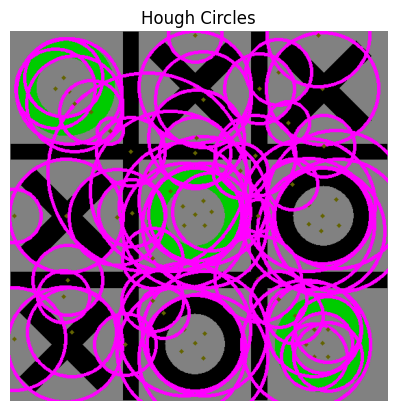

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('image/Tic_Tac_Toe.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

# Draw circles on the image
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        # Circle center
        cv2.circle(image, center, 1, (0, 100, 100), 3)
        # Circle outline
        cv2.circle(image, center, radius, (255, 0, 255), 3)

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with Matplotlib
plt.imshow(image_rgb)
plt.title('Hough Circles')
plt.axis('off')  # Hide axis
plt.show()


### Summary
The Hough Transform is a versatile tool for detecting geometric shapes like lines and circles in images. It works by transforming the problem into a parameter space where shapes can be identified as peaks in an accumulator array. The Hough Line Transform and Hough Circle Transform are specific implementations for detecting lines and circles, respectively, leveraging this powerful technique.